## Загрузка библиотек

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from typing import Tuple, List

## Загрузка данных

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [26]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    return pd.read_csv(path_to_csv), None


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    data: pd.DataFrame = pd.read_csv(path_to_csv)
    return data.drop('target', axis = 1), data['target']

In [27]:
COVID_DATA_PATH = './hw_EDA_data/covid.csv'
HR_DATA_PATH = './hw_EDA_data/hr.csv'

In [28]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

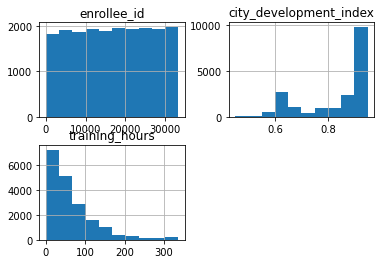

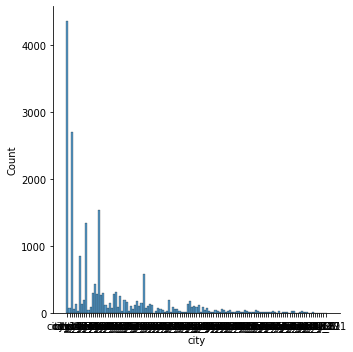

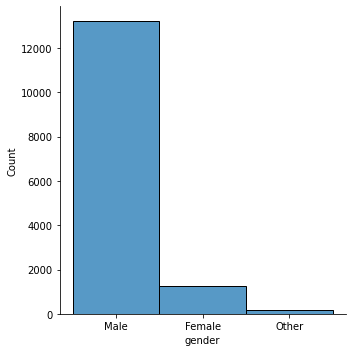

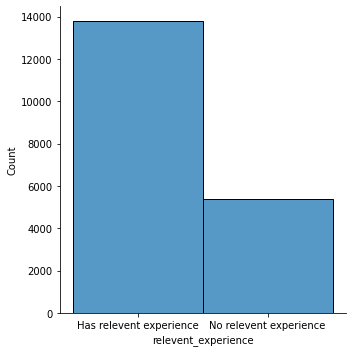

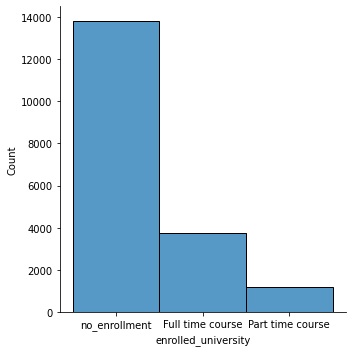

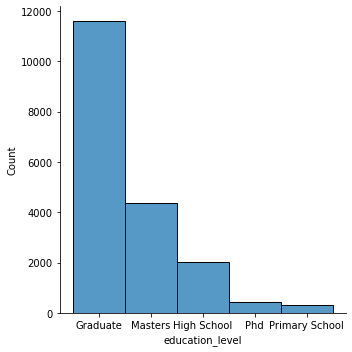

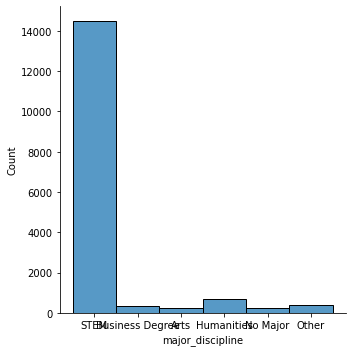

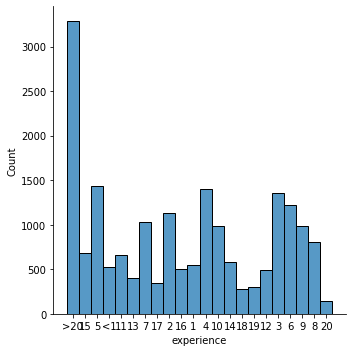

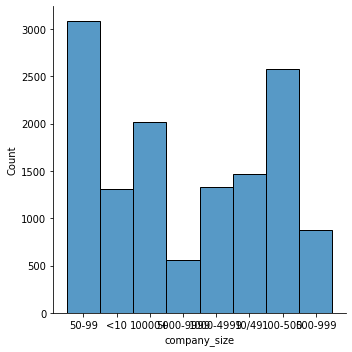

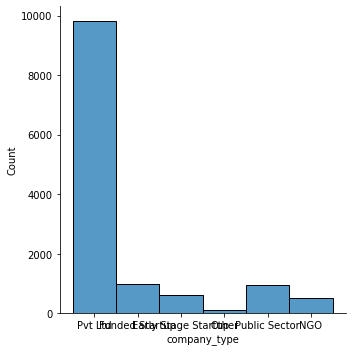

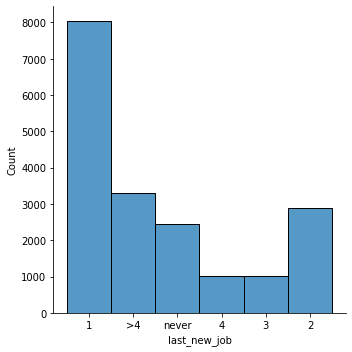

In [78]:
def split_features(X: pd.DataFrame) -> Tuple[List[str], List[str]]:
    numeric_features = list(filter(
        lambda label: type(X[label].dtype) in [type(np.dtype(np.int64)), type(np.dtype(np.float64))],
        X.columns
    ))
    categorial_features = list(filter(lambda label: label not in numeric_features, X.columns))

    return numeric_features, categorial_features

numeric_features, categorial_features = split_features(X_hr)

_ = X_hr[numeric_features].hist()

for feature in X_hr[categorial_features]:
    sns.displot(X_hr[feature])

#### 2.
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [30]:
print(f'Исходный размер датасета hr {X_hr.shape[0]}')

Исходный размер датасета hr 19158


In [33]:
X_hr_dropna = X_hr.dropna()

In [34]:
print(f'Pазмер датасета hr без NaN {X_hr_dropna.shape[0]}')

Pазмер датасета hr без NaN 8955


_Ваш ответ_: Размер датасета уменьшился более чем в два раза. Статистика по количеству значений в каждой категории уменьшилась соответственно, кроме того, целиком исчезли некоторые категории

Давайте попробуем избежать сокращения размера датасета.

#### 3.
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

#### 4.
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_: У числовых признаков нет пропущенных значений, поэтому неважно, чем заменять

In [81]:
from functools import reduce

numeric_features, _ = split_features(X_hr)

for feature in numeric_features:
    print(feature, X_hr[feature].shape[0], X_hr[feature].dropna().shape[0])

def fill_na(X: pd.DataFrame, y: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    # Возвращает данные без NaN значений
    def get_means(means: dict, label: str) -> dict:
        means[label] = X[label].mean()
        return means

    def get_modes(modes: dict, label: str) -> dict:
        modes[label] = X[label].mode()[0]
        return modes

    numeric_features, categorial_features = split_features(X)
    
    X_fill = X.fillna(dict(reduce(get_means, numeric_features, {}))) \
        .fillna(dict(reduce(get_modes, categorial_features, {})))
    
    return X_fill, y

enrollee_id 19158 19158
city_development_index 19158 19158
training_hours 19158 19158


In [76]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

#### 5. 
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

In [ ]:
numeric_features, categorial_features = split_features(X_hr_fill)

_ = X_hr_fill[numeric_features].hist()

for feature in X_hr_fill[categorial_features]:
    sns.displot(X_hr_fill[feature])

_Ваш ответ_: Для числовых приззаков в датасете нет NA значений, поэтому никак. В случае категориальных признаков может вызвать перевес доминирующей категории

### Задание

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [137]:
groups = X_covid.groupby('country').size()
country = groups[groups == 46].first_valid_index()

# _ = X_covid[X_covid['country'] == country].plot.line('date', 'total_vaccinations')
na_rows = X_covid[(X_covid['country'] == country) & (X_covid['total_vaccinations'].isna())]

begin, end, size = na_rows.first_valid_index() - 1, na_rows.last_valid_index() + 1, na_rows + 2


111

_Ваш ответ_

### Задание 
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


In [ ]:
# YOUR_CODE

_Ваш ответ_

### Задание 
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [ ]:
def encode(X):
    # Возвращает данные без категориальных признаков
    return X_encode

In [ ]:
X_hr_encode = encode(X_hr_fill)

_Ваш ответ_

### Задание 
Выполните задание для датасета _hr_.




#### 1. 
Реализуйте функцию undersampling

#### 2. 
Реализуйте функцию oversampling

In [ ]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    return X_over, y_over

In [ ]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

#### 3. 
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = # YOUR_CODE
X_hr_SMOTE, y_hr_SMOTE = # YOUR_CODE

#### 4.
Как изменились распределения признаков при различных тактиках балансирования датасета?

In [ ]:
# YOUR CODE

_Ваш ответ_